# Predicting and analyzing student interraction and student success rate using Machine Learning algorithm.
                          -Anish Ghosh and Debopriyo Mukhopadhyay

##1.Predicting Student Interraction.

Required Header Files

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from google.colab import files


uploaded = files.upload()


Saving online_classroom_data.csv to online_classroom_data.csv


In [4]:
df = pd.read_csv('online_classroom_data.csv', index_col=0)
df

,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,1600.0,"2,1","2,4","3,5","3,6","1,7",0
1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,592.0,"0,3","0,3",0,"0,1","0,2",0
2,2.0,4.0,3.0,9.0,0.0,16.0,1.0,8.0,1110.0,8,5,5,7,5,1
3,5.0,1.0,3.0,9.0,2.0,11.0,0.0,8.0,8651.0,6,5,4,6,4,1
4,14.0,6.0,15.0,28.0,0.0,50.0,0.0,45.0,34172.0,"8,7",9,"6,5",10,"8,8",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,46.0,53.0,90.0,89.0,3.0,150.0,0.0,155.0,39314.0,10,10,8,10,10,1
67,6.0,5.0,14.0,16.0,5.0,24.0,0.0,22.0,13221.0,"6,7","6,7",4,"8,3","9,4",1
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,988.0,0,0,0,"0,1",0,0
69,2.0,2.0,2.0,2.0,0.0,7.0,0.0,9.0,2100.0,"2,2","1,9","2,5","1,1","8,4",0


In [7]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [8]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [9]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('online_classroom_data.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'online_classroom_data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 71 rows and 16 columns


In [10]:
df1.head(5)

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
0,0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,1600.0,"2,1","2,4","3,5","3,6","1,7",0
1,1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,592.0,"0,3","0,3",0,"0,1","0,2",0
2,2,2.0,4.0,3.0,9.0,0.0,16.0,1.0,8.0,1110.0,8,5,5,7,5,1
3,3,5.0,1.0,3.0,9.0,2.0,11.0,0.0,8.0,8651.0,6,5,4,6,4,1
4,4,14.0,6.0,15.0,28.0,0.0,50.0,0.0,45.0,34172.0,"8,7",9,"6,5",10,"8,8",1


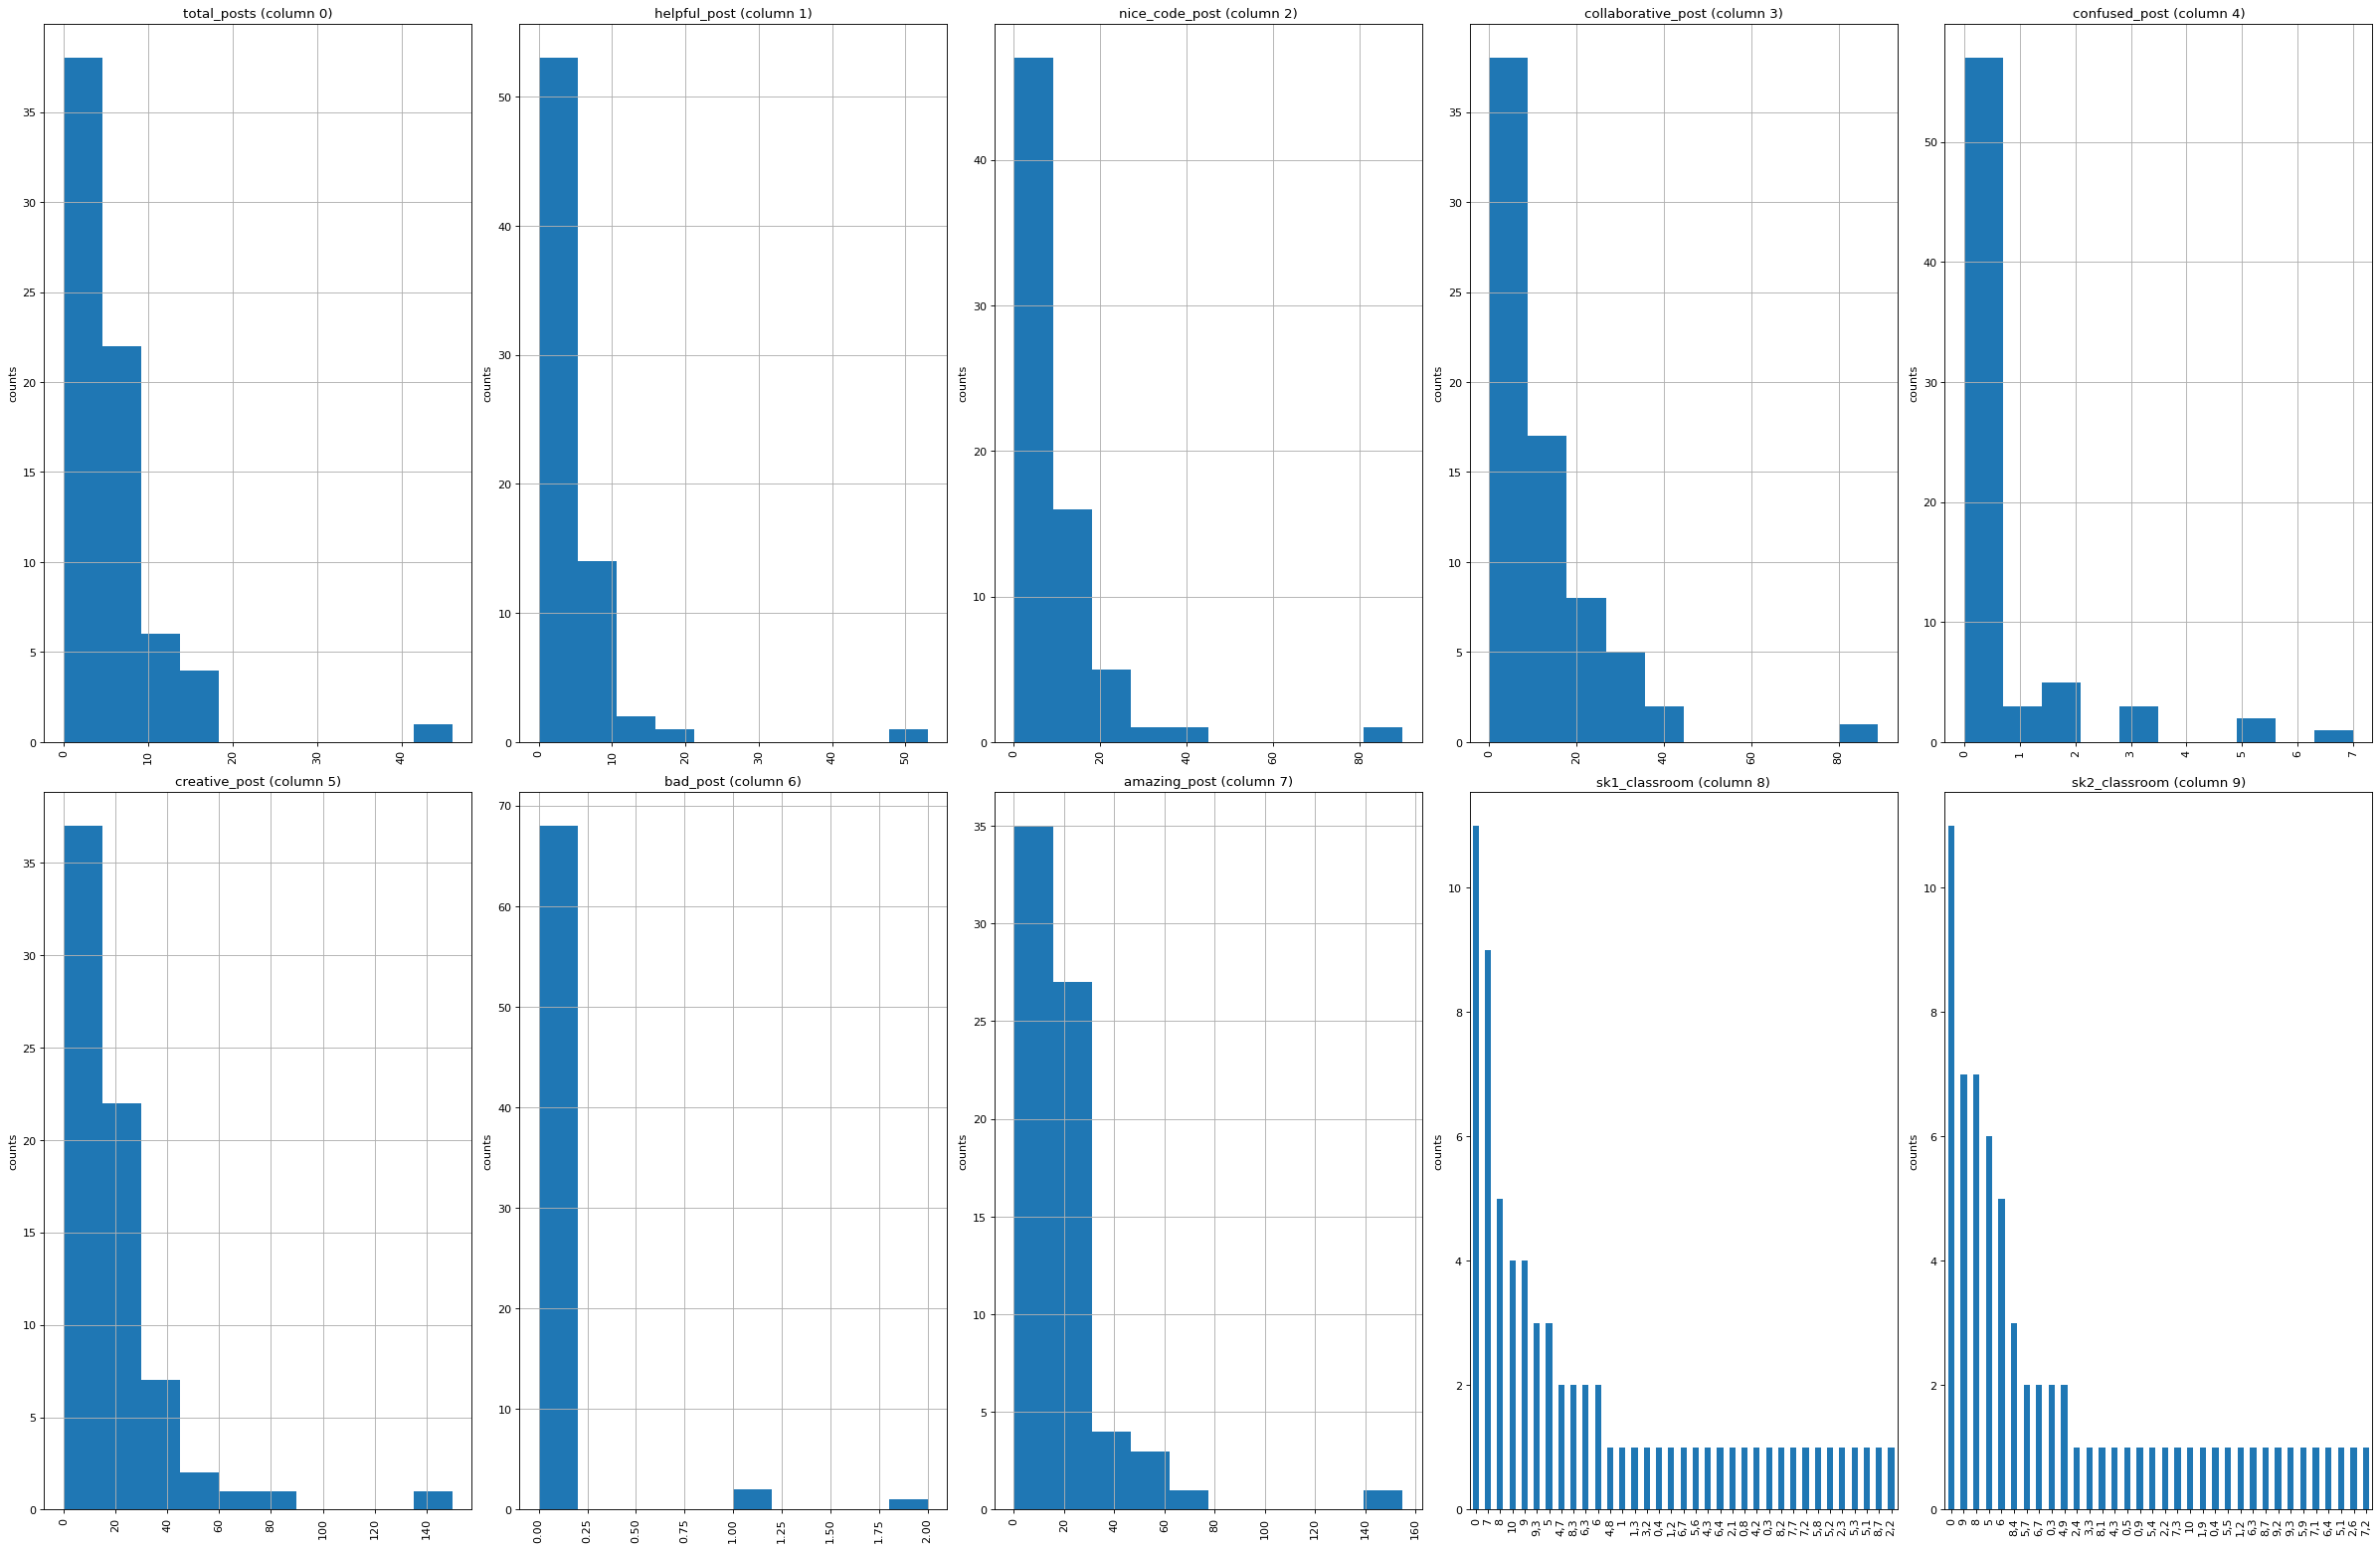

In [11]:
plotPerColumnDistribution(df1, 10, 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


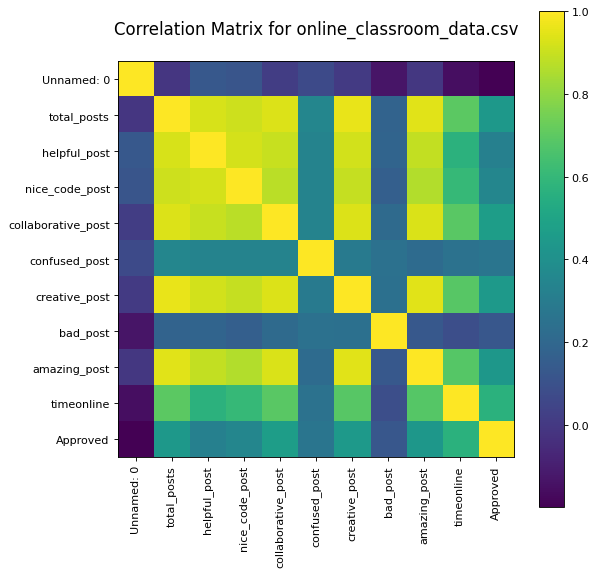

In [12]:
plotCorrelationMatrix(df1, 8)

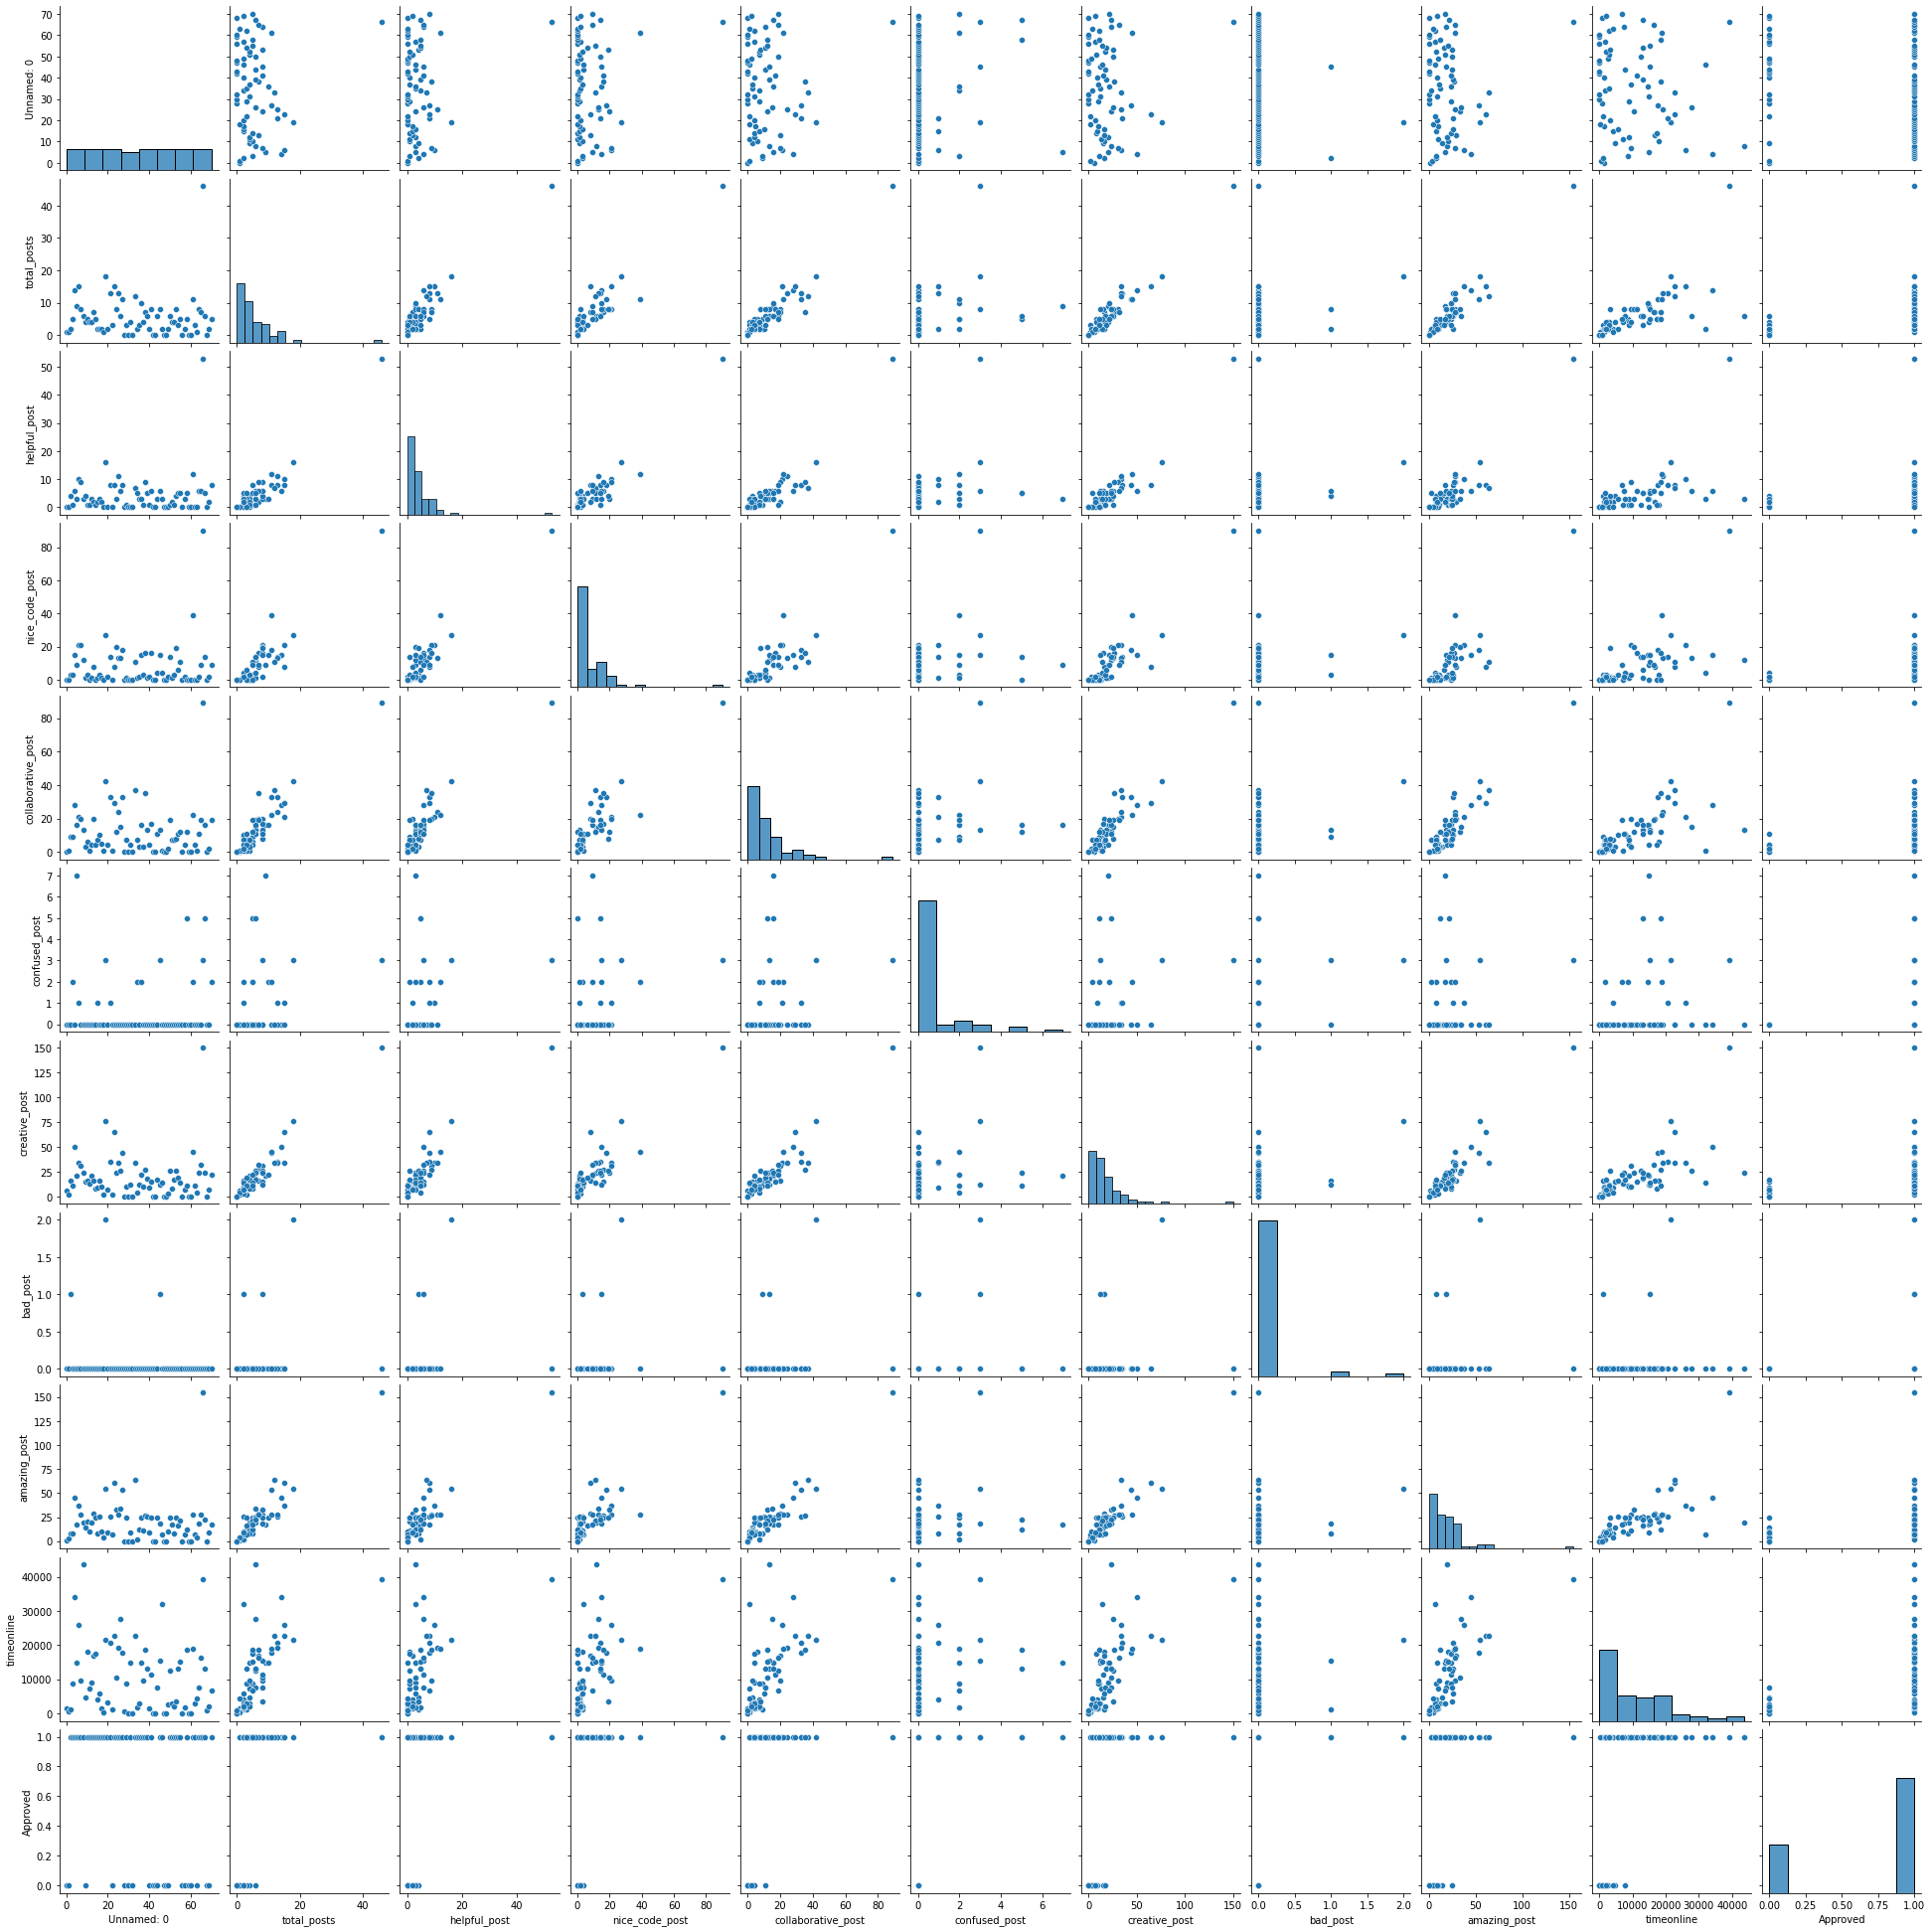

In [15]:
import seaborn as sns 
sns.pairplot(df1)

##2.Analyzing Success Rate of student.


Require Header Files.

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Data Loading

In [17]:
df_data_1 = pd.read_csv('online_classroom_data.csv', index_col=0)
df_data_1.replace(',', '.', regex=True, inplace=True)
df_data_1.head()

,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,1600.0,2.1,2.4,3.5,3.6,1.7,0
1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,592.0,0.3,0.3,0,0.1,0.2,0
2,2.0,4.0,3.0,9.0,0.0,16.0,1.0,8.0,1110.0,8,5,5,7,5,1
3,5.0,1.0,3.0,9.0,2.0,11.0,0.0,8.0,8651.0,6,5,4,6,4,1
4,14.0,6.0,15.0,28.0,0.0,50.0,0.0,45.0,34172.0,8.7,9,6.5,10,8.8,1


Feature Scaling and target

In [18]:
from sklearn import preprocessing

y = df_data_1['Approved'].values

X = df_data_1[['total_posts', 'helpful_post', 'nice_code_post', 'collaborative_post', 'confused_post','creative_post','bad_post','amazing_post','timeonline']].values
X = preprocessing.StandardScaler().fit(X).transform(X)

Simple Train/test split

In [20]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (56, 9) (56,)
Test set: (15, 9) (15,)


Model Fitting

In [21]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)
xgboost_yhat = xgb_model.predict(X_test)

[18:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Model Metrics


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,xgboost_yhat.round()))
print(classification_report(y_test,xgboost_yhat.round()))
print(accuracy_score(y_test, xgboost_yhat.round()))

[[ 2  0]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.85      0.92        13

    accuracy                           0.87        15
   macro avg       0.75      0.92      0.79        15
weighted avg       0.93      0.87      0.88        15

0.8666666666666667
